In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
ticker = 'WEGE3.SA';
data = pd.DataFrame();
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close'];

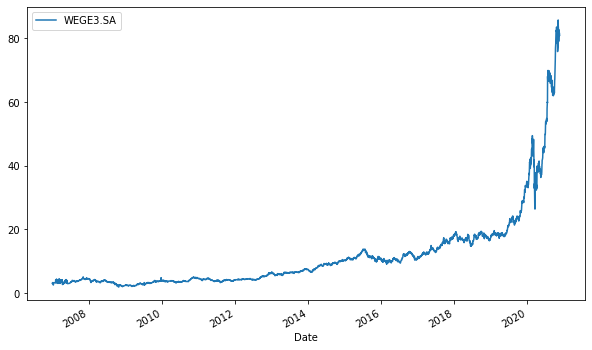

In [4]:
data.plot(figsize = (10,6));

In [5]:
log_returns = np.log(1 + data.pct_change());
u = log_returns.mean()
u

WEGE3.SA    0.000956
dtype: float64

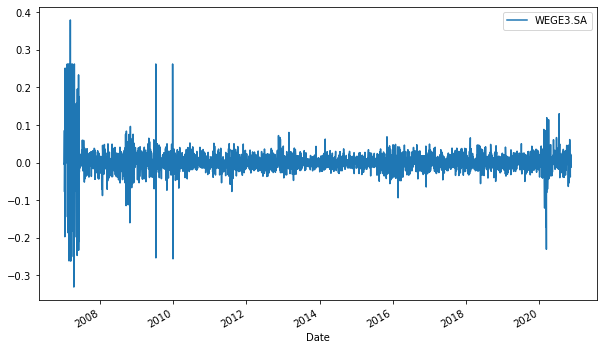

In [6]:
log_returns.plot(figsize = (10,6));

In [7]:
var = log_returns.var();
var

WEGE3.SA    0.001057
dtype: float64

In [8]:
drift = u - (0.5 * var);
drift

WEGE3.SA    0.000428
dtype: float64

In [9]:
stdev = log_returns.std();

In [10]:
t_intervals = 1000;
iterations = 10;

In [11]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)));

In [12]:
S0 = data.iloc[-1];
price_list = np.zeros_like(daily_returns);
price_list[0] = S0;

In [13]:
for t in range(1, t_intervals):
	price_list[t] = price_list[t - 1] * daily_returns[t];

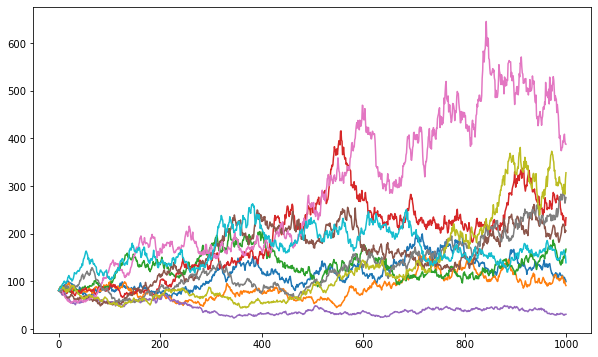

In [14]:
plt.figure(figsize = (10,6));
plt.plot(price_list);